<br><br>
<center><font size='5'><b>Deep Learning for All_pytorch</b></font><br><br><font size='5'>ImageFolder_<b></b></font>

# ImageFolder

- 나만의 데이터셋을 준비하기
- torchvision.datasets.ImageFolder으로 불러오기
- transforms 적용하여 저장하기

![image](https://user-images.githubusercontent.com/48466625/61350751-91c12280-a8a3-11e9-975e-0be8d87fa61f.png)

- original_data에 dog/cat을 넣어놨는데 크기가 499*375, 너무 크다. 줄여서 다시 저장할 필요가 있다

## import torchvision.datasets.ImageFolder

In [ ]:
import torchvision
from torchvision import transforms

from torch.utils.data import DataLoader
from matplotlib.pyplot import imshow
%matplotlib inline

In [27]:
ls custom_data

 Volume in drive C has no label.
 Volume Serial Number is 3454-EB62

 Directory of C:\Users\user\Desktop\Artificial Intelligence\STUDY\DLforALL_pytorch\custom_data

07/17/2019  03:22 PM    <DIR>          .
07/17/2019  03:22 PM    <DIR>          ..
07/17/2019  03:15 PM    <DIR>          original_data
               0 File(s)              0 bytes
               3 Dir(s)  112,850,804,736 bytes free


In [28]:
train_data = torchvision.datasets.ImageFolder(root='custom_data/original_data', transform=None)

In [29]:
for num, value in enumerate(train_data):
    data, label = value
    print(num, data, label)

0 <PIL.Image.Image image mode=RGB size=300x280 at 0x231ACF00A58> 0
1 <PIL.Image.Image image mode=RGB size=489x499 at 0x231AC95D518> 0
2 <PIL.Image.Image image mode=RGB size=431x410 at 0x231ACBECF28> 0
3 <PIL.Image.Image image mode=RGB size=300x224 at 0x231ACBECF98> 0
4 <PIL.Image.Image image mode=RGB size=499x315 at 0x231ACC04080> 0
5 <PIL.Image.Image image mode=RGB size=320x267 at 0x231ACC040F0> 0
6 <PIL.Image.Image image mode=RGB size=405x353 at 0x231ACC04160> 0
7 <PIL.Image.Image image mode=RGB size=448x258 at 0x231ACC041D0> 0
8 <PIL.Image.Image image mode=RGB size=499x375 at 0x231ACC04240> 0
9 <PIL.Image.Image image mode=RGB size=500x374 at 0x231ACC042B0> 0
10 <PIL.Image.Image image mode=RGB size=320x223 at 0x231ACC04320> 0
11 <PIL.Image.Image image mode=RGB size=312x396 at 0x231ACC04390> 0
12 <PIL.Image.Image image mode=RGB size=500x374 at 0x231ACC04400> 0
13 <PIL.Image.Image image mode=RGB size=500x345 at 0x231ACC04470> 0
14 <PIL.Image.Image image mode=RGB size=500x374 at 0x231AC

0 <PIL.Image.Image image mode=RGB size=300x280 at 0x231AC8B3358> 0


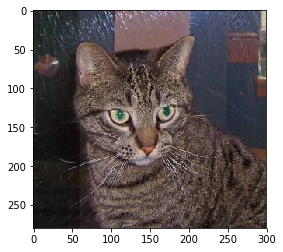

In [30]:
for num, value in enumerate(train_data):
    data, label = value
    print(num, data, label)
    
    imshow(data)
    
    break

## 사이즈 줄이기

In [31]:
#Compose는 transform 여러개를 하나로 묶어주는 것 
trans = transforms.Compose([
    transforms.Resize((100,100))
]) 

train_data = torchvision.datasets.ImageFolder(root='custom_data/original_data', transform=trans)

0 <PIL.Image.Image image mode=RGB size=100x100 at 0x231ACF0CC18> 0


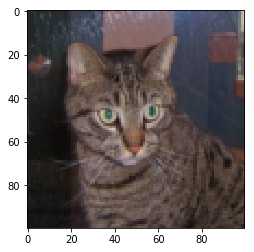

In [32]:
for num, value in enumerate(train_data):
    data, label = value
    print(num, data, label)
    
    imshow(data)
    break

## 리사이즈 한 것을 그대로 저장하기

In [33]:
for num, value in enumerate(train_data):
    data, label = value
    print(num, data, label)
    
    if label == 0:
        data.save('custom_data/train_data/cat/%d_%d.jpeg'%(num, label)) #폴더는 만들어줘야 함/ num_label.jpeg로 저장될 것
    else:
        data.save('custom_data/train_data/dog/%d_%d.jpeg'%(num, label))

0 <PIL.Image.Image image mode=RGB size=100x100 at 0x231ACD1E358> 0
1 <PIL.Image.Image image mode=RGB size=100x100 at 0x231ACD1E4A8> 0
2 <PIL.Image.Image image mode=RGB size=100x100 at 0x231ACD1E6D8> 0
3 <PIL.Image.Image image mode=RGB size=100x100 at 0x231ACD1E3C8> 0
4 <PIL.Image.Image image mode=RGB size=100x100 at 0x231ACD1E630> 0
5 <PIL.Image.Image image mode=RGB size=100x100 at 0x231ACDFD080> 0
6 <PIL.Image.Image image mode=RGB size=100x100 at 0x231ACDFDDD8> 0
7 <PIL.Image.Image image mode=RGB size=100x100 at 0x231ACDFDD30> 0
8 <PIL.Image.Image image mode=RGB size=100x100 at 0x231ACDFD2B0> 0
9 <PIL.Image.Image image mode=RGB size=100x100 at 0x231ACDFD9E8> 0
10 <PIL.Image.Image image mode=RGB size=100x100 at 0x231ACDFD518> 0
11 <PIL.Image.Image image mode=RGB size=100x100 at 0x231ACDFD048> 0
12 <PIL.Image.Image image mode=RGB size=100x100 at 0x231ACDFD9B0> 0
13 <PIL.Image.Image image mode=RGB size=100x100 at 0x231ACDFD4E0> 0
14 <PIL.Image.Image image mode=RGB size=100x100 at 0x231AC

## DataLoader

In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.utils.data import DataLoader

In [43]:
trans = transforms.Compose([
    transforms.ToTensor()
])

train_data = torchvision.datasets.ImageFolder(root='custom_data/train_data', transform=trans)

In [44]:
data_loader = DataLoader(dataset=train_data, batch_size=8, shuffle=True, num_workers=2)

## 모델 및 학습

In [53]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,6,5), # input channel3, output channel6, kernel size=5
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(6,16,5),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.layer3 = nn.Sequential(
            nn.Linear(16*22*22, 120),
            nn.ReLU(),
            nn.Linear(120,2)
        )
        
    def forward(self, x):
        out = self.layer1(x)
#         print(out.shape) # 이렇게 두면 각 레이어 통과하고 사이즈가 어떤지 알 수 있음
        out = self.layer2(out)
#         print(out.shape)
        out = out.view(out.shape[0],-1)
#         print(out.shape)
        out = self.layer3(out)
#         print(out.shape)
        return out

In [54]:
# 사이즈 테스트, 확인 후에는 위에 print들은 꼭 지워줘야 함.
net = CNN()
test_input = torch.Tensor(3,3,100,100)
test_out = net(test_input)

In [55]:
optimizer = optim.Adam(net.parameters(), lr=0.0001)
loss_func = nn.CrossEntropyLoss()

In [61]:
total_batch = len(data_loader)
print('total_batch = {}'.format(total_batch))

epochs=10

for epoch in range(epochs):
    avg_cost = 0.0
    for num, data in enumerate(data_loader):
        imgs, labels = data
#         imgs = imgs.to(device)
#         labels = labels.to(device)
        
        optimizer.zero_grad()
        out = net(imgs)
        loss = loss_func(out, labels)
        loss.backward()
        optimizer.step()
        
        avg_cost += loss / total_batch
        
    print('Epoch:{}, cost={}'.format(epoch+1, avg_cost))
    
print('Learning Done')

total_batch = 7
Epoch:1, cost=0.5355504751205444
Epoch:2, cost=0.5176553130149841
Epoch:3, cost=0.4832491874694824
Epoch:4, cost=0.4492735266685486
Epoch:5, cost=0.438473105430603
Epoch:6, cost=0.41916531324386597
Epoch:7, cost=0.3942234218120575
Epoch:8, cost=0.38625970482826233
Epoch:9, cost=0.39222681522369385
Epoch:10, cost=0.33685392141342163
Learning Done


## 모델 save and load

In [65]:
torch.save(net.state_dict(), './saved_model/model_ex.pth') # net의 state_dict를 저장한다

In [67]:
new_net = CNN() # 네트워크 구조는 똑같이 선언을해주고

In [68]:
new_net.load_state_dict(torch.load('./saved_model/model_ex.pth')) # 불러오기

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [75]:
# 확인해보기 

print(net.layer1[0]) # net의 layer1의 첫번째
print(new_net.layer1[0])

print(net.layer1[0].weight[0][0][0])
print(new_net.layer1[0].weight[0][0][0])

# 동일한지 비교 

net.layer1[0].weight[0] == new_net.layer1[0].weight[0]

Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
tensor([ 0.1120, -0.0564,  0.0099, -0.0828,  0.0032], grad_fn=<SelectBackward>)
tensor([ 0.1120, -0.0564,  0.0099, -0.0828,  0.0032], grad_fn=<SelectBackward>)


tensor([[[1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1]],

        [[1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1]],

        [[1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1]]], dtype=torch.uint8)

## Test하기

In [ ]:
trans=torchvision.transforms.Compose([
    transforms.Resize((64,128)),
    transforms.ToTensor()
])
test_data = torchvision.datasets.ImageFolder(root='./custom_data/test_data', transform=trans)

In [ ]:
test_set = DataLoader(dataset = test_data, batch_size = len(test_data))

In [ ]:
with torch.no_grad():
    for num, data in enumerate(test_set):
        imgs, label = data
        imgs = imgs.to(device)
        label = label.to(device)
        
        prediction = net(imgs)
        
        correct_prediction = torch.argmax(prediction, 1) == label
        
        accuracy = correct_prediction.float().mean()
        print('Accuracy:', accuracy.item())